In [17]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from matplotlib import rcParams
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import counts_statistics as cs
import functools as ft
import numpy.linalg as lg
import scipy.linalg as sp
import QPE_Function as qpef
from tkinter import Tcl
from tqdm import tqdm


In [18]:
############################################################### VERIFICATION ANALYSIS ######################################################

# Loading the data files
data_dirs = [r'C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\Private_Quantum_Sensing']

os.chdir(data_dirs[0])
filenames = ["QPE_RealRun_Plus_20250505203254"]
x_data_final = []
fail_list_final = []

for index, file in enumerate(filenames):
    fail_list = []
    s = set()
    measurement_basis = []
    x_data = []
    n_files = 0
    os.chdir(f"{data_dirs[0]}\{file}\counts")
    file_aux=[i for i in glob.glob("ABCD=*.txt")]
    measurement_basis  =  sorted(file_aux, key = qpef.last_4chars)
    
    for i in range(len(file_aux)):   
        s.add(qpef.last_4chars(file_aux[i]))

    Round_measurement_basis = qpef.separation(measurement_basis,s)
        
    # Defining the non-local game (the sign associated with each stabilizer)
    stabilizers =  stabilizers = [
            "iiii",
            "zzii",
            "izzi",
            "iizz",
            "xxxx",
            "zizi",
            "iziz",
            "zzzz",
            "xyyx",
            "yxyx",
            "xxyy",
            "yyxx",
            "ziiz",
            "yxxy",
            "xyxy",
            "yyyy"
        ]
    for i in tqdm(range(len(s))):
        stab_sign = [1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , -1 , -1 , -1 , -1 , 1 , -1 , -1 , 1 ]
        STABILIZER_TO_INDEX = {stab: i for i, stab in enumerate(stabilizers)}
        working_dir_data =  data_dirs[0]
        # # We re-calculate the statistics for the randomly selected data
        stats = cs.Operartors_Statistics(4, stabilizers, stab_sign, STABILIZER_TO_INDEX, Round_measurement_basis[i], data_dirs[0] + "//" + filenames[index] + "//counts")
        stats.shuffle_data()
        writting_dir = working_dir_data + "//test"
        os.makedirs(f"{writting_dir}", exist_ok=True)
        samples_evolution = np.arange(1, stats.n_loops+1, 1)
        p_pass_list,_,p_fail_list,_,n_samples_list = stats.get_both_probability_evolution(samples_evolution, writting_dir)         
        x_data.append(np.array(n_samples_list, dtype=float))
        fail_list.append(np.array(p_fail_list, dtype=float))
    
    fail_list_final.append(fail_list)
    x_data_final.append(x_data)

100%|██████████| 1/1 [00:00<00:00,  2.74it/s]


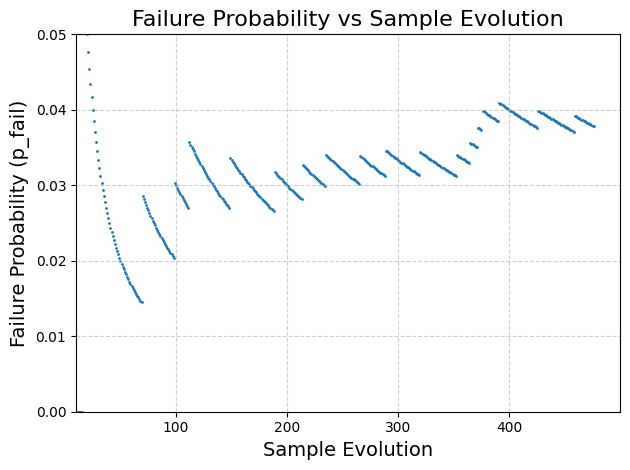

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import os
import glob

# Ensure reproducibility by using a seed if needed
# Ensure reproducibility by using a seed if needed

# Iterate over data files and visualize p_fail_list£
for x_data,fail_list in zip(x_data_final,fail_list_final):
    
    for i, p_fail_list in enumerate(fail_list):
        plt.scatter(
            x_data[i],
            p_fail_list,
            s=1,  # Increase scatter size
            alpha=1,  # Reduce point opacity for clarity
            label=f"Dataset {i + 1}"  # Dynamic legend labels
        )

    # Customize plot
    plt.xlim(10)  # Refine x-axis limits
    plt.grid(True, linestyle="--", alpha=0.6)  # Light gridlines
    plt.ylim(0,0.05)
    plt.xlabel("Sample Evolution", fontsize=14)  # X-axis label
    plt.ylabel("Failure Probability (p_fail)", fontsize=14)  # Y-axis label
    plt.title("Failure Probability vs Sample Evolution", fontsize=16)  # Plot title
    plt.tight_layout()  # Avoid clipping
    plt.show()


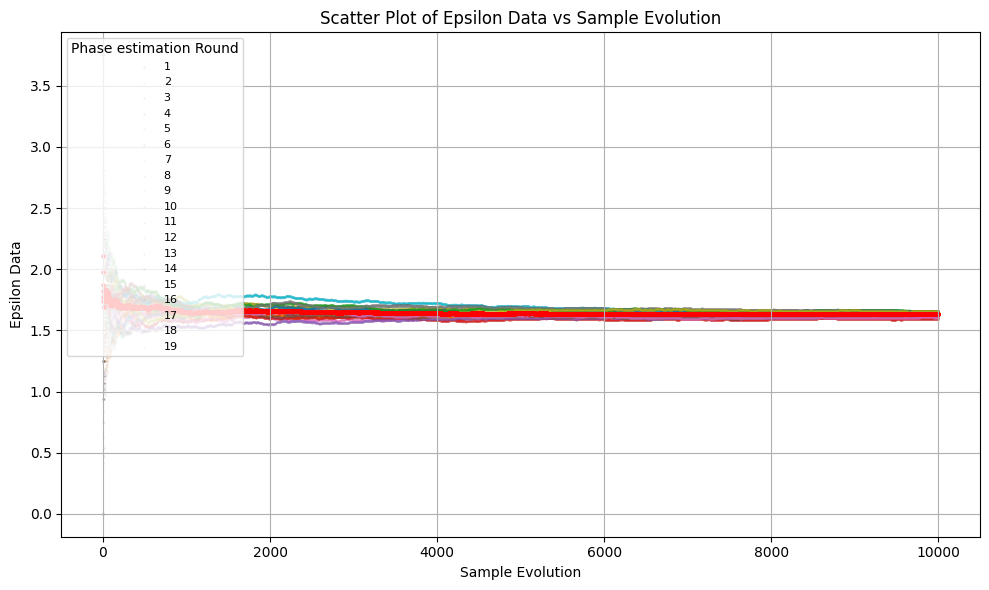

In [196]:
import matplotlib.pyplot as plt

significance_data = []
lamb = 1/2
nu = 1/2
r = 0.3

for x_data,fail_list in zip(x_data_final,fail_list_final):
    epsilon_mean = []
    fail_list_mean = []

    for i in range(np.shape(x_data)[1]):
        fail_list_mean_value = 0
        for j in range(np.shape(fail_list)[0]):
            fail_list_mean_value = fail_list_mean_value + fail_list[j][i]
        fail_list_mean.append(fail_list_mean_value/np.shape(fail_list)[0])

    plt.figure(figsize=(10, 6))  # Adjust figure size for better readability

    for j in range(np.shape(fail_list)[0]):
        epsilon_data = []
        for i in range(len(fail_list[j])):
            epsilon_data.append(qpef.calculate_epsilon(fail_list[j][i], lamb, nu, r))    
        # Use a colormap for better differentiation and transparency to reduce clutter
        plt.scatter(x_data[j], epsilon_data, s=1, alpha=0.05, label=f"{j + 1}")

    for i in range(len(fail_list_mean)):
        epsilon_mean.append(qpef.calculate_epsilon(fail_list_mean[i], lamb, nu, r))
    
    plt.scatter(x_data[0], epsilon_mean, s=5, alpha=1, color = 'r')


    # Add axis labels, title, and legend
    plt.xlabel("Sample Evolution")
    plt.ylabel("Epsilon Data")
    plt.title("Scatter Plot of Epsilon Data vs Sample Evolution")
    plt.grid()
    plt.legend(fontsize=8, title="Phase estimation Round")
    plt.tight_layout()


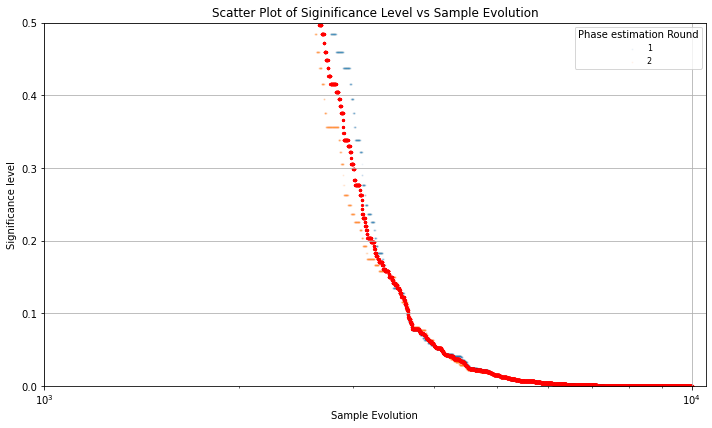

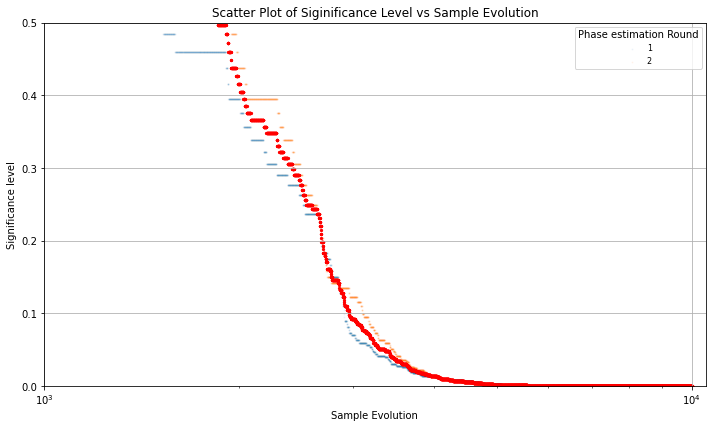

In [112]:
import matplotlib.pyplot as plt

lamb = 1/2
nu = 1/2
r = 0.3

for x_data,fail_list in zip(x_data_final,fail_list_final):
    significance_mean = []
    epsilon_mean = []
    fail_list_mean = []
    for i in range(np.shape(x_data)[1]):
        fail_list_mean_value = 0
        for j in range(np.shape(fail_list)[0]):
            fail_list_mean_value = fail_list_mean_value + fail_list[j][i]
        fail_list_mean.append(fail_list_mean_value/np.shape(fail_list)[0])
    
    plt.figure(figsize=(10, 6))

    for j in range(np.shape(fail_list)[0]):
        epsilon_data = []
        significance_data = []
        for i in range(len(fail_list[j])):
            epsilon_data.append(qpef.calculate_epsilon(fail_list[j][i], lamb, nu, r))
            significance_data.append(qpef.calculate_delta(x_data[j][i], epsilon_data[i], r,lamb, nu))   
        # Use a colormap for better differentiation and transparency to reduce clutter
        plt.scatter(x_data[j], significance_data, s=1, alpha=0.05, label=f"{j + 1}")

    for i in range(len(fail_list_mean)):
        epsilon_mean.append(qpef.calculate_epsilon(fail_list_mean[i], lamb, nu, r))
        significance_mean.append(qpef.calculate_delta(x_data[j][i], epsilon_mean[i], r,lamb, nu))
    
    plt.scatter(x_data[0], significance_mean, s=5, alpha=1, color = 'r')

        
    # Add axis labels, title, and legend
    plt.xlabel("Sample Evolution")
    plt.ylabel("Significance level")
    plt.title("Scatter Plot of Siginificance Level vs Sample Evolution")
    plt.grid()
    plt.xlim(1000)
    plt.ylim(0,0.5)
    plt.legend(fontsize=8, title="Phase estimation Round")
    plt.tight_layout()
    plt.xscale('log')


In [ ]:
N = np.linspace(1,400000)
significance_data = []
for i in range(len(N)):
    significance_data.append(qpef.calculate_delta(N[i], 0.0, 0.7, lamb, nu))

plt.plot(N,significance_data)

In [ ]:
for i in range(len(significance_data)):
    plt.scatter(significance_data,qpef.N_rob(0.08, 0.7, lamb, nu, significance_data[i]) - N)

In [ ]:
############################################################### PHASE ESTIMATION ANALYSIS ######################################################
data_dirs = [r'C:\Users\QILIP6\Desktop\Multipartite Entanglement Experiment\Data\E_voting']
os.chdir(data_dirs[0])

filenames = ["COMPLETE_QPE_PLUS_THIRD_RUN_20250223170150"]
P_plus_list = []
P_minus_list = []
P_plus_error_list = []
P_minus_error_list = []
n_samples_list_list = []
measurement_basis = []
Measurement = []
n_files = 0

for index, file in enumerate(filenames):
    os.chdir(f"{data_dirs[0]}\{file}\counts")
    file_aux=[i for i in glob.glob("ABCD*.txt")]
    measurement_basis  = file_aux
    stabilizers =['xxxx',"vvvv"]   

    stab_sign = [1,-1]
    STABILIZER_TO_INDEX = {stab: i for i, stab in enumerate(stabilizers)}
    working_dir_data =  data_dirs[0]
    # # We re-calculate the statistics for the randomly selected data
    stats = cs.Operartors_Statistics(4, stabilizers, stab_sign, STABILIZER_TO_INDEX, measurement_basis, data_dirs[0] + "\\" + filenames[index] + "\counts")
    writting_dir = working_dir_data + "//test"
    os.makedirs(f"{writting_dir}", exist_ok=True)
    samples_evolution = np.arange(1, stats.n_loops+1, 1)
    P_plus,P_plus_error,P_minus,P_minus_error,n_samples_list = stats.get_both_probability_evolution(samples_evolution, writting_dir)
    Measurement.append(stats.measurement)
    P_plus_list.append(P_plus)
    P_minus_list.append(P_minus)
    P_plus_error_list.append(P_plus_error)
    P_minus_error_list.append(P_minus_error)
    n_samples_list_list.append(n_samples_list)



No handles with labels found to put in legend.


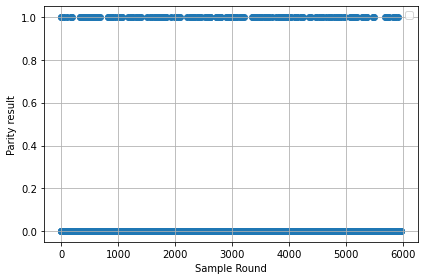

In [264]:
for i in (range(len(n_samples_list_list))):
    plt.scatter(n_samples_list_list[i],Measurement[i])
    plt.xlabel("Sample Round")
    plt.ylabel("Parity result")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()



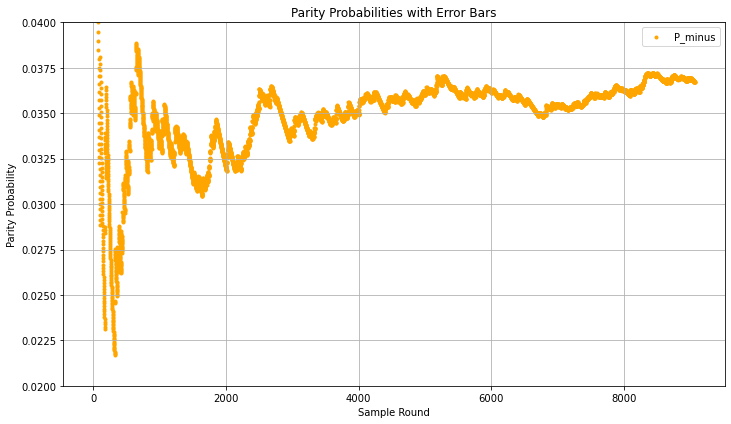

In [276]:

# Create a single plot with both P_plus and P_minus data

# Loop through each sample round and plot data

for i, samples in enumerate(n_samples_list_list):
    plt.figure(figsize=(10, 6))  # Set the figure size for better visibility

    # Scatter plot for P_plus and P_minus
    #plt.scatter(samples, P_plus_list[i], color='blue', label='P_plus' if i == 0 else "", marker='o')
    plt.scatter(samples, P_minus_list[i], color='orange', label='P_minus' if i == 0 else "", marker='.')

    # Error bars for P_plus and P_minus
    #plt.errorbar(samples, P_plus_list[i], yerr=P_plus_error_list[i], fmt='o', color='blue', alpha=0.7)
    #plt.errorbar(samples, P_minus_list[i], yerr=P_minus_error_list[i], fmt='x', color='orange', alpha=0.7)

    # Add labels, legend, and grid
    plt.xlabel("Sample Round")
    plt.ylabel("Parity Probability")
    plt.title("Parity Probabilities with Error Bars")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.ylim(0.02,0.04)

    # Display the plot
    plt.show()


In [237]:
import scipy.optimize as sp


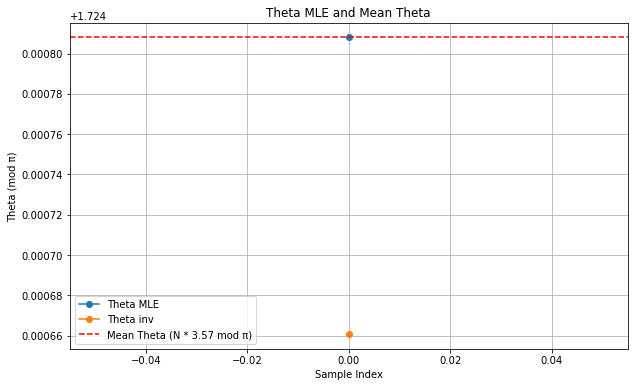

In [238]:
# Calculate average failure rate
#result = sum([fail[-1] for fail in fail_list_final]) / len(fail_list_final)

# Initialize lists to store results
theta_mle = []
theta_inverse = []
std_theta = []

# Iterate through each sample list
for i, samples in enumerate(n_samples_list_list):
    N = 4  # Number of samples
    Y_init = np.pi  # Initial guess for optimization
    F = 0.03  # Failure rate parameter

    # Perform optimization to find maximum likelihood estimate (MLE)
    initial_guess = sp.minimize(
        qpef.Maximun_Likelihood,
        Y_init,
        args=(np.real(1 - F), N, np.array(Measurement[i])),
        method='Nelder-Mead'
    ).x[0]

    mle = sp.minimize(
        qpef.Maximun_Likelihood,
        initial_guess,
        args=(np.real(1 - F), N, np.array(Measurement[i])),
        method='Nelder-Mead'
    ).x[0]

    theta_mle.append(mle)

    # Compute inverse probability
    theta_inverse_value = qpef.Prob(P_minus_list[i][-1], N, 1 - F, signe=False)
    theta_inverse.append(theta_inverse_value)

# Calculate mean and standard deviation of MLE
theta_mean = np.mean(theta_mle)
std_theta.append(qpef.STD(theta_mean, theta_mle))

# Plot results
plt.figure(figsize=(10, 6))  # Set figure size for better readability
plt.plot(N * np.array(theta_mle) % np.pi, label="Theta MLE", marker='o', linestyle='-')
plt.plot(N * np.array(theta_inverse) % np.pi, label="Theta inv", marker='o', linestyle='-')

plt.axhline(N * theta_mean % np.pi, color='red', linestyle='--', label=f"Mean Theta (N * {theta_mean:.2f} mod π)")

# Add labels, legend, and title
plt.xlabel("Sample Index")
plt.ylabel("Theta (mod π)")
plt.title("Theta MLE and Mean Theta")
plt.legend()
plt.grid(True)  # Add grid for better readability
plt.show()
